In [29]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Perceptron_py import Perceptron

In [2]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL :', s)

URL : https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data


In [6]:
df = pd.read_csv('C:\ML\iris.data', header = None, encoding = 'utf-8')
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


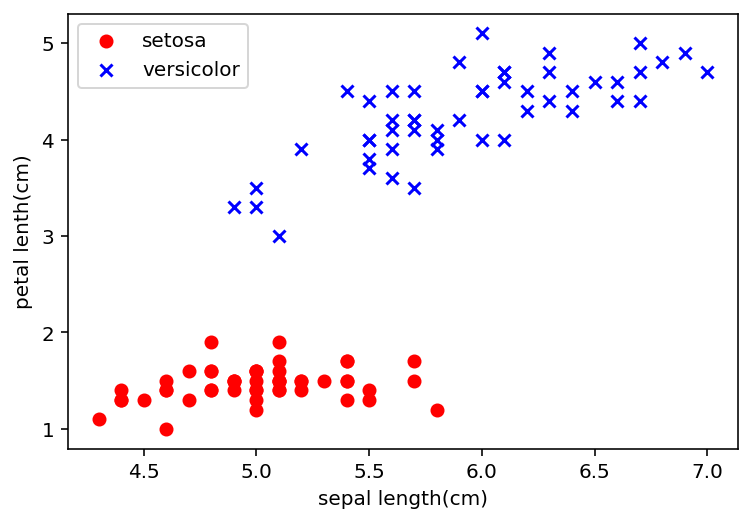

In [44]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
#print(y)
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
#plt.scatter(X[100:, 0], X[100:, 1], color = 'green', marker = 'o', label = 'virginica')

plt.xlabel('sepal length(cm)')
plt.ylabel('petal lenth(cm)')

plt.legend(loc = 'upper left')
plt.show()

In [45]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
ppn.errors_

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]

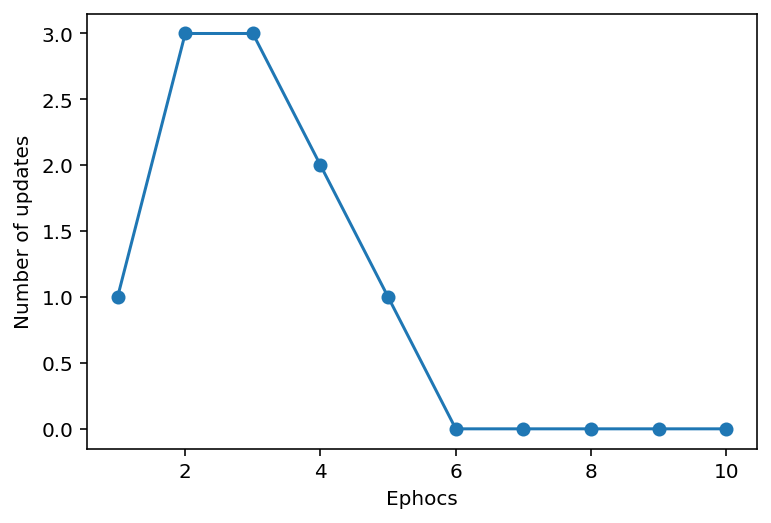

In [46]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Ephocs')
plt.ylabel('Number of updates')
plt.show()

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_resions(X, y, classifier, resolution = 0.02):
    #마커 및 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계 그리기
    #x1 : sepal(꽃받침) length
    x1_min, x1_max = X[:, 0].min() -1 , X[:, 0].max() + 1
    #x2 : petal(꽃잎) length
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolors='black')

C:\Users\XODLR_~1\AppData\Local\Temp/ipykernel_11820/4093096322.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolors='black')


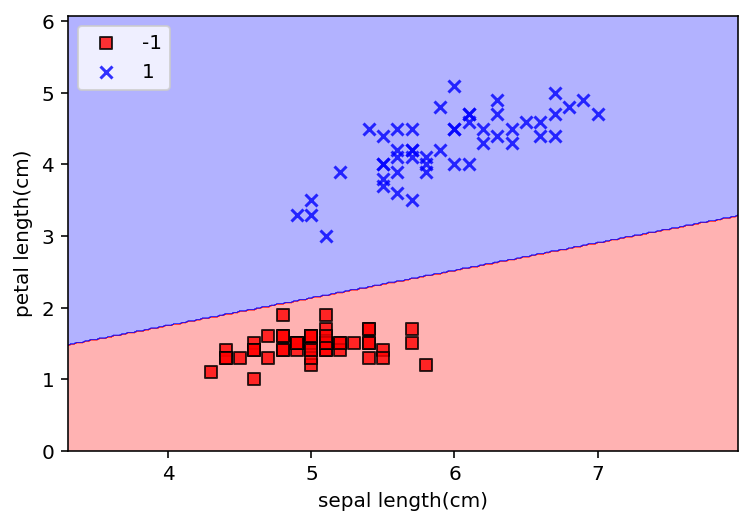

In [50]:
plot_decision_resions(X, y, classifier=ppn)
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.legend(loc = 'upper left')
plt.show()

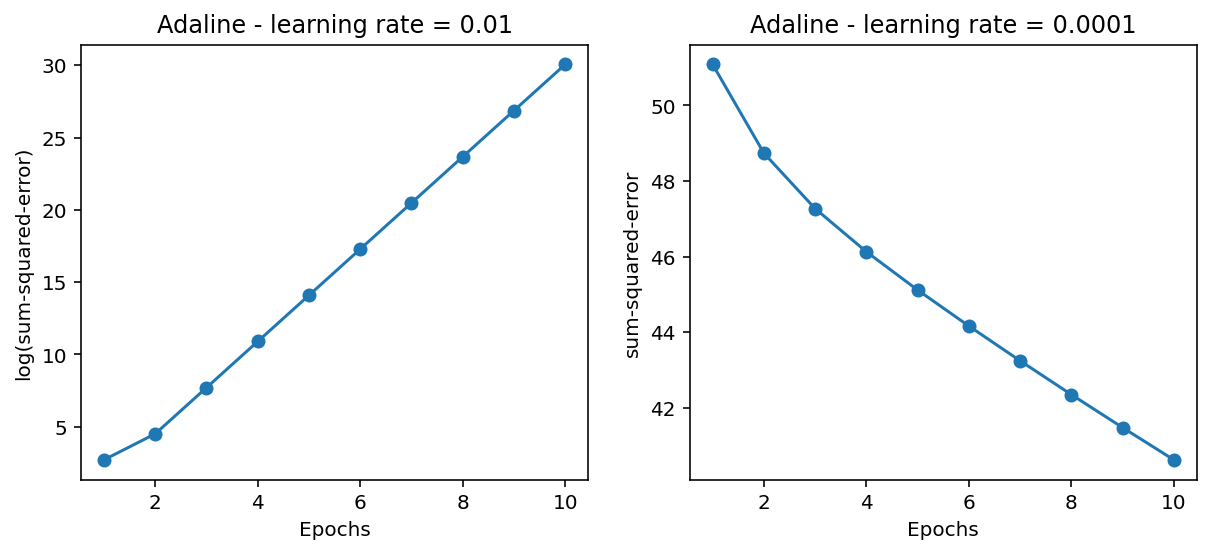

In [51]:
from AdlineGd_py import AdalineGD

fig, ax = plt.subplots(nrows =1, ncols = 2, figsize = (10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_) +1, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline - learning rate = 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('sum-squared-error')
ax[1].set_title('Adaline - learning rate = 0.0001')

plt.show()


In [ ]:
X_std = np.copy(X)
X_std[:,0], (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:,1], (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)

plot_decision_resions(X_std, y, classifier=ada)
plt.title('Adaline - gradient descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel